In [215]:
!uv pip install pandas numpy scikit-learn seaborn matplotlib scipy

Using Python 3.11.2 environment at: /home/zaq/cslab/venv
Audited 6 packages in 889ms


In [216]:
import pandas as pd


laptops=pd.read_csv("laptopPrice.csv")

In [217]:
laptops.head()

,brand,processor_brand,processor_name,processor_gnrtn,ram_gb,ram_type,ssd,hdd,os,os_bit,graphic_card_gb,weight,warranty,Touchscreen,msoffice,Price,rating,Number of Ratings,Number of Reviews
0,ASUS,Intel,Core i3,10th,4 GB,DDR4,0 GB,1024 GB,Windows,64-bit,0 GB,Casual,No warranty,No,No,34649,2 stars,3,0
1,Lenovo,Intel,Core i3,10th,4 GB,DDR4,0 GB,1024 GB,Windows,64-bit,0 GB,Casual,No warranty,No,No,38999,3 stars,65,5
2,Lenovo,Intel,Core i3,10th,4 GB,DDR4,0 GB,1024 GB,Windows,64-bit,0 GB,Casual,No warranty,No,No,39999,3 stars,8,1
3,ASUS,Intel,Core i5,10th,8 GB,DDR4,512 GB,0 GB,Windows,32-bit,2 GB,Casual,No warranty,No,No,69990,3 stars,0,0
4,ASUS,Intel,Celeron Dual,Not Available,4 GB,DDR4,0 GB,512 GB,Windows,64-bit,0 GB,Casual,No warranty,No,No,26990,3 stars,0,0


In [218]:
laptops=laptops.drop("os_bit",axis=1)

In [219]:
laptops.isna().sum()

brand                0
processor_brand      0
processor_name       0
processor_gnrtn      0
ram_gb               0
ram_type             0
ssd                  0
hdd                  0
os                   0
graphic_card_gb      0
weight               0
warranty             0
Touchscreen          0
msoffice             0
Price                0
rating               0
Number of Ratings    0
Number of Reviews    0
dtype: int64

In [220]:
laptops.shape

(823, 18)

1. There are no null-values in the dataset


In [221]:
laptops.dtypes

brand                object
processor_brand      object
processor_name       object
processor_gnrtn      object
ram_gb               object
ram_type             object
ssd                  object
hdd                  object
os                   object
graphic_card_gb      object
weight               object
warranty             object
Touchscreen          object
msoffice             object
Price                 int64
rating               object
Number of Ratings     int64
Number of Reviews     int64
dtype: object

In [222]:
laptops['ram_gb'] = laptops['ram_gb'].str.split().str.get(0).astype(int)
laptops['ssd'] = laptops['ssd'].str.split().str.get(0).astype(int)
laptops['hdd'] = laptops['hdd'].str.split().str.get(0).astype(int)
laptops['graphic_card_gb'] = laptops['graphic_card_gb'].str.split().str.get(0).astype(int)
laptops['rating'] = laptops['rating'].str.split().str.get(0).astype(float)

In [223]:
cat_cols = laptops.select_dtypes(include='object')
num_cols = laptops.select_dtypes(include="number")

In [224]:
cat_cols.columns

Index(['brand', 'processor_brand', 'processor_name', 'processor_gnrtn',
       'ram_type', 'os', 'weight', 'warranty', 'Touchscreen', 'msoffice'],
      dtype='object')

In [225]:
## exploratory data analysis

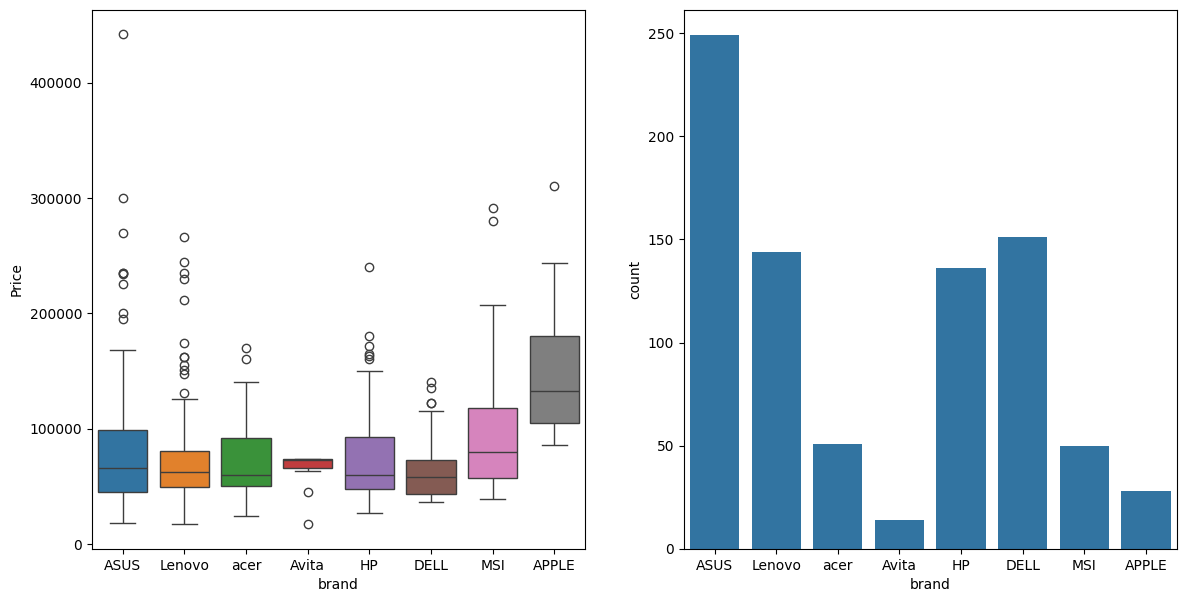

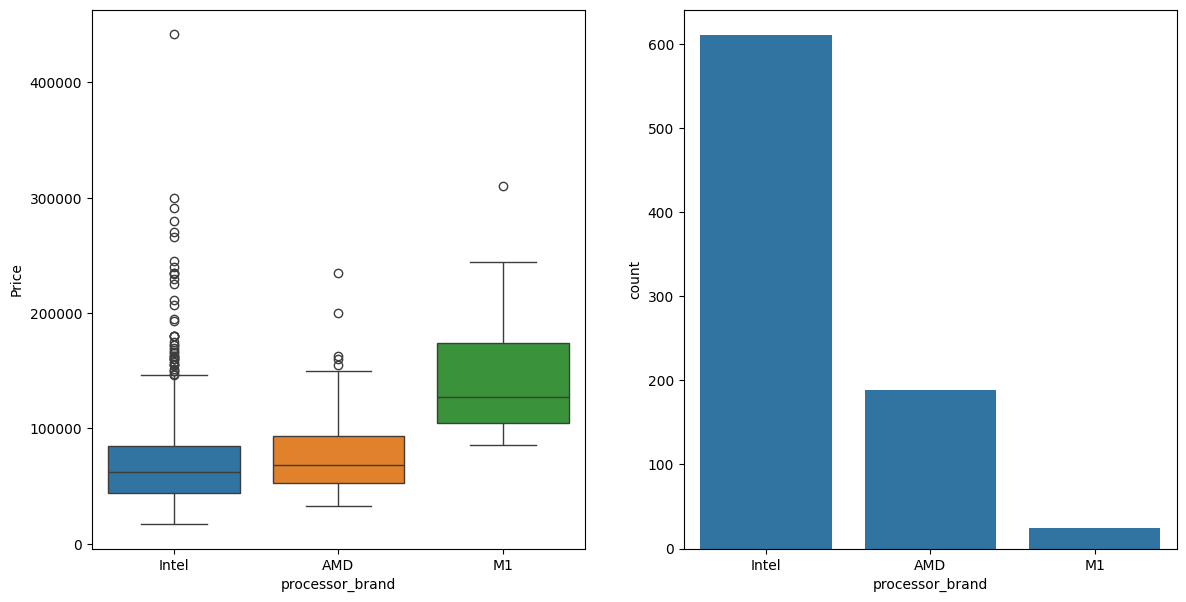

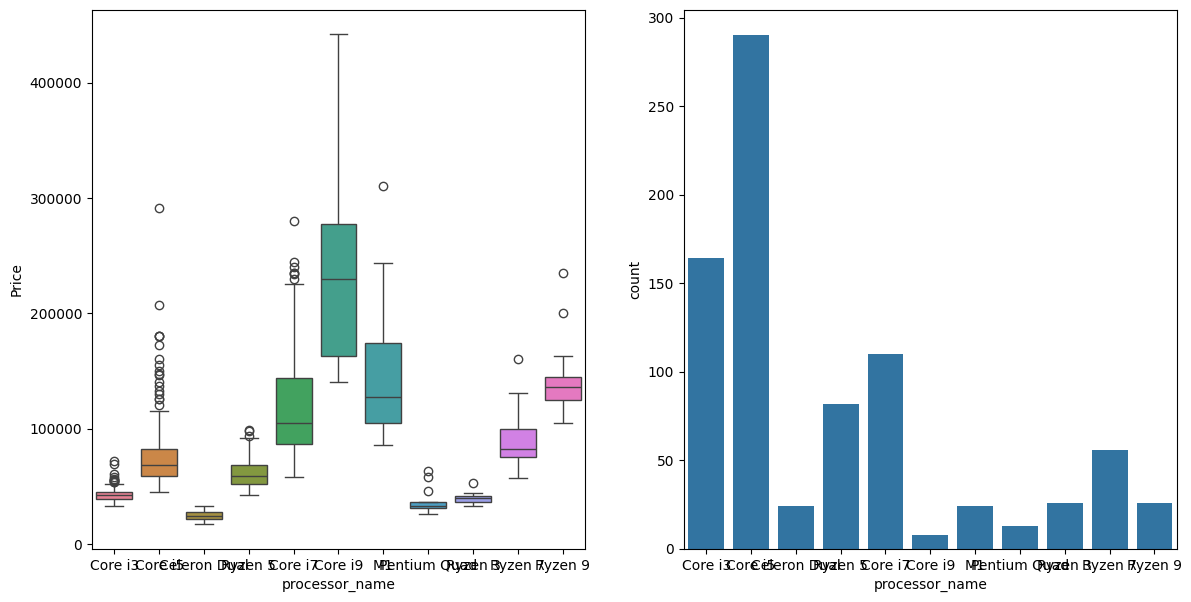

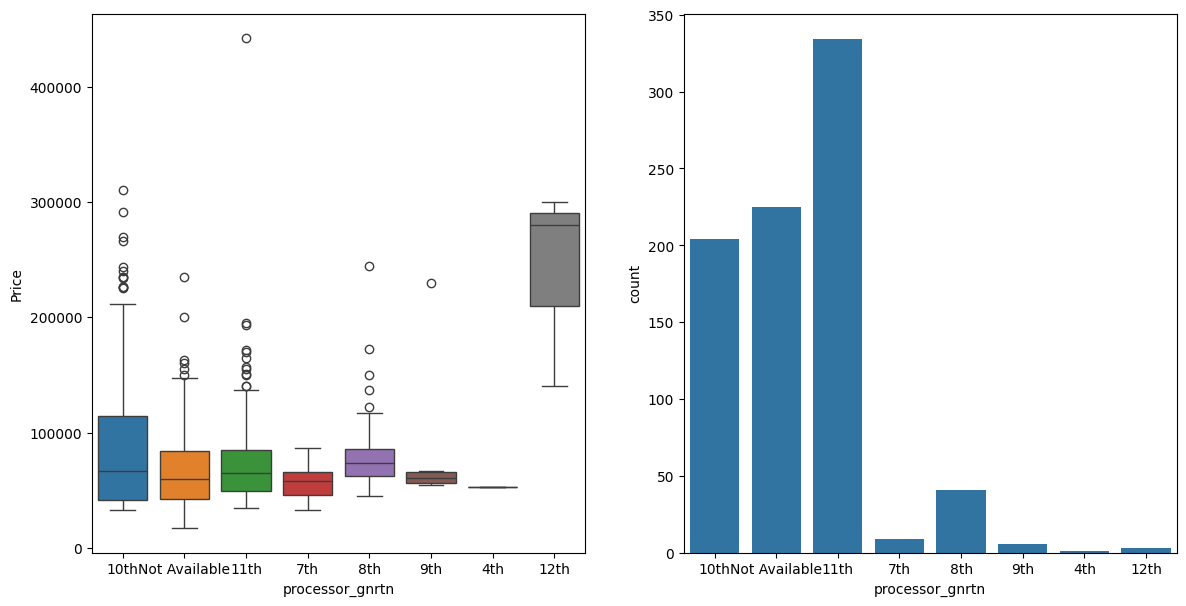

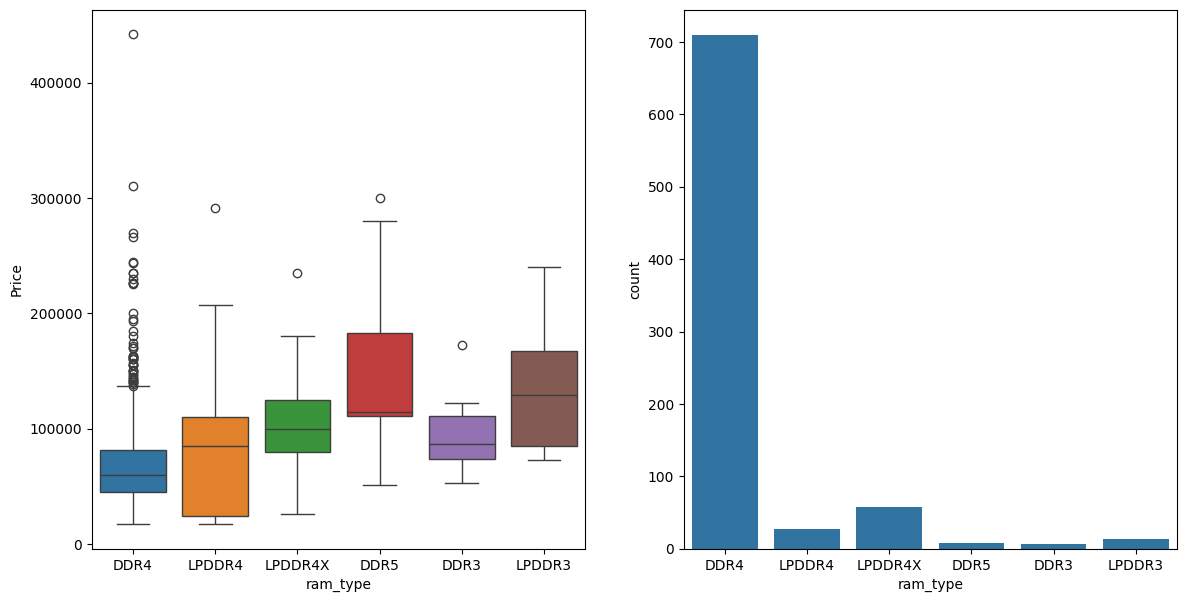

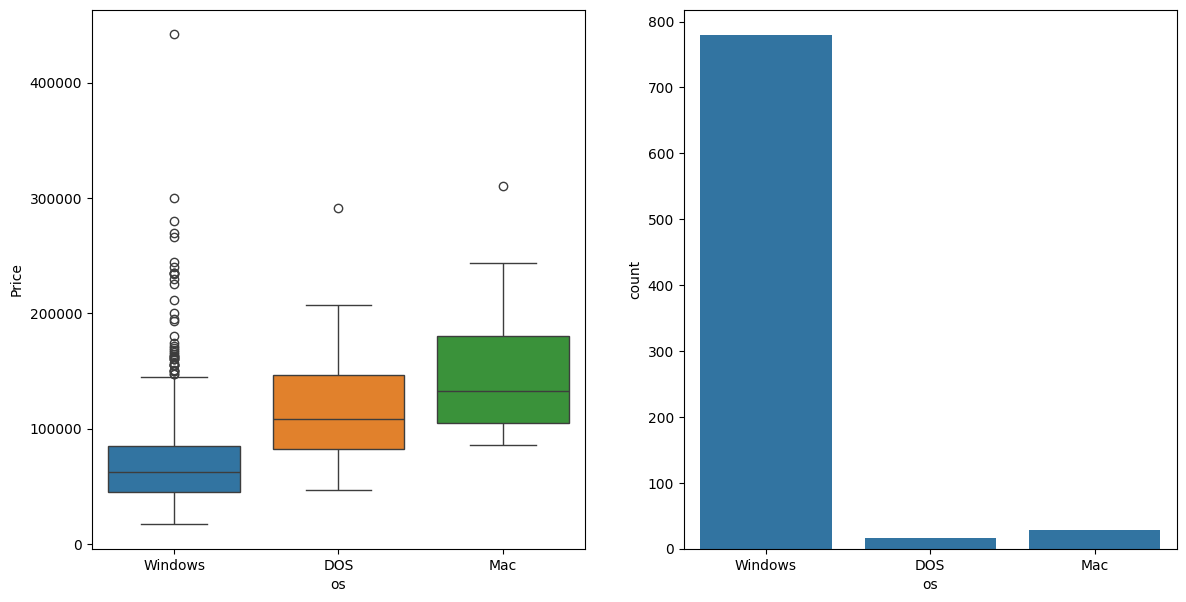

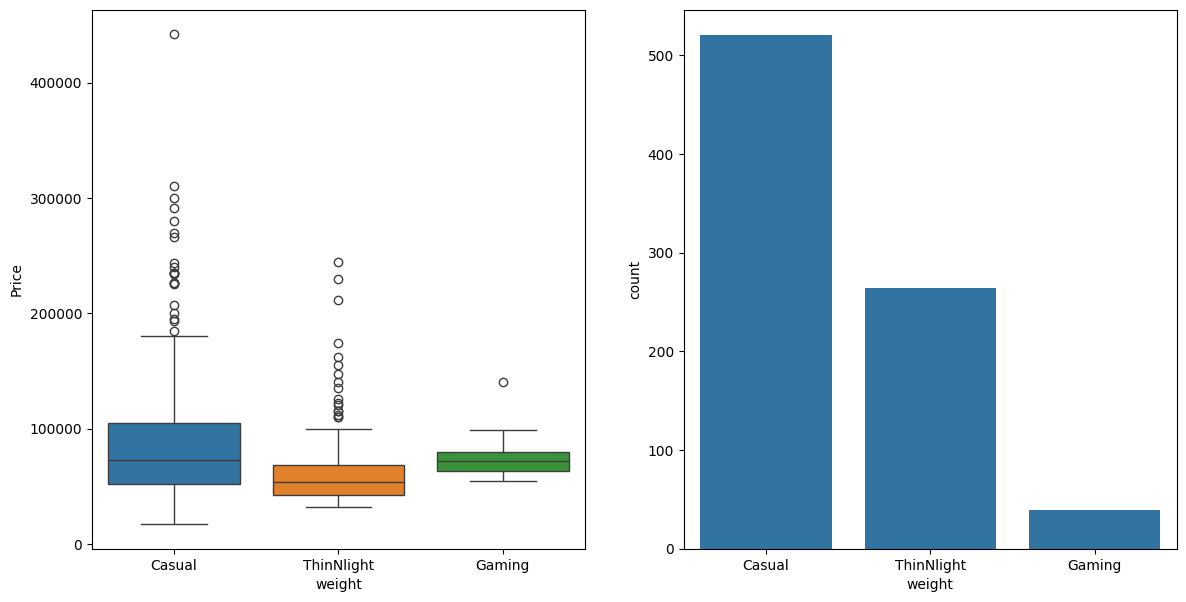

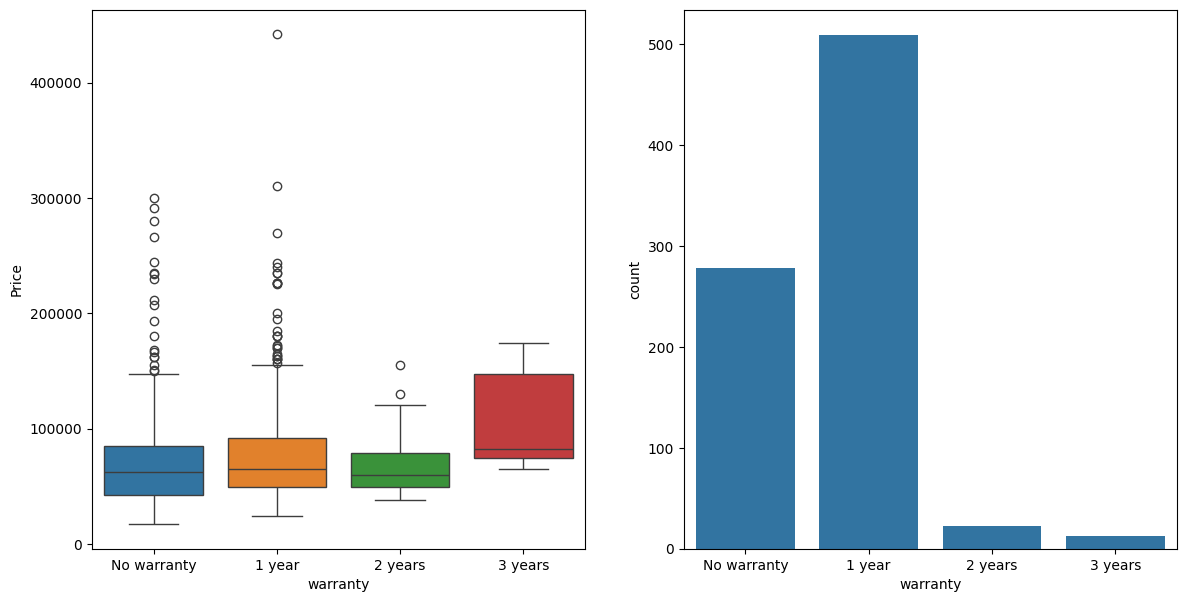

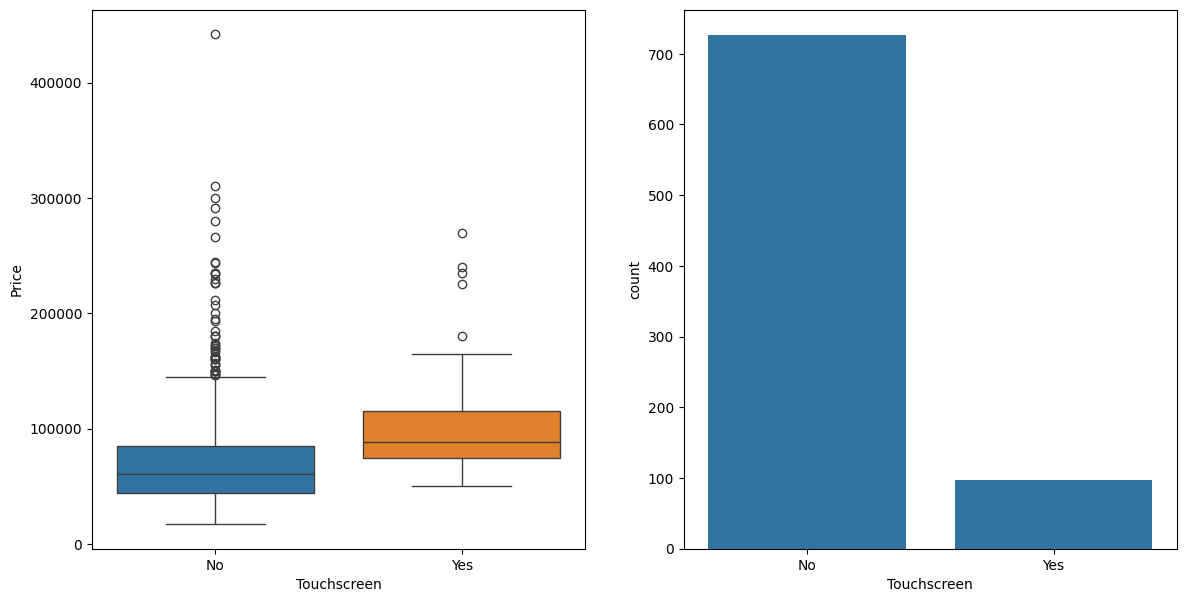

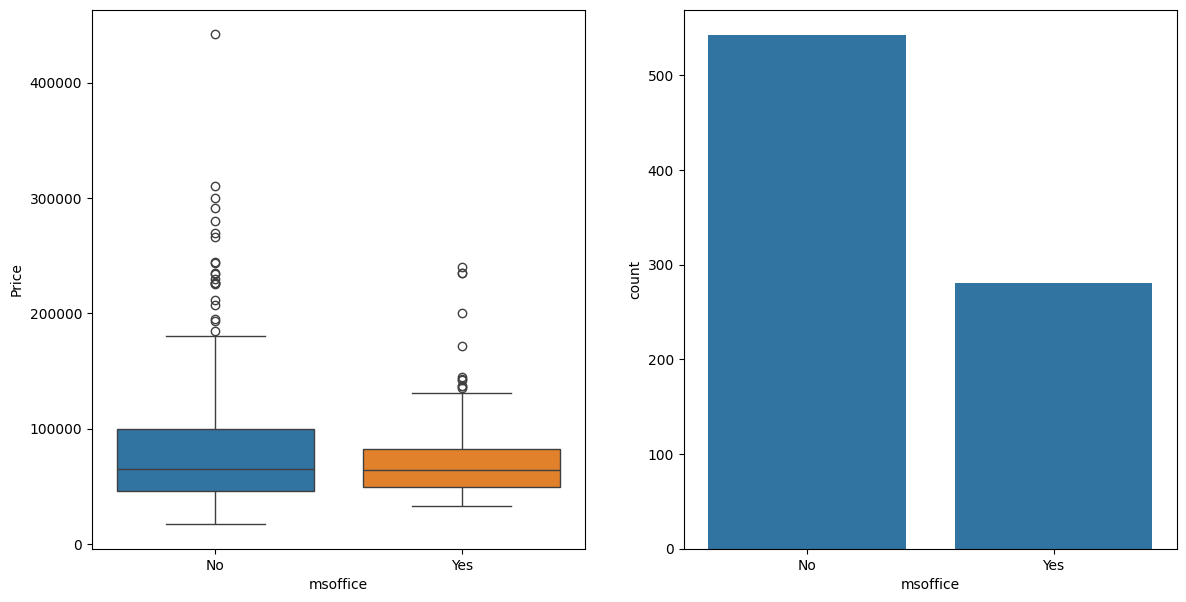

In [226]:
import matplotlib.pyplot as plt
import seaborn as sns

for feature in cat_cols:
  fig,axes=plt.subplots(nrows=1,ncols=2, figsize=(14,7))
  sns.countplot(ax=axes[1],x=laptops[feature])
  sns.boxplot(ax=axes[0],x=laptops[feature],y=laptops.Price,hue=laptops[feature])
plt.show()

### OBSERVATIONS
1. AMD seems to be highly represented in the dataset.
2. Core i9 seems to be the most expensive processor but core i3 and core i5 are highly represented.
3. M1 processors are expensive but intel processors are highly represented
4. 10 th and 11 gen processors are more represented.
5. Majority laptops have 8GB RAM. 32GB is very expensive.
6. 2TB hdd is very expensive but most laptops have 512GB hdd.
7. DDR5 is very expensive but DDR4 is very much prevalent.
8. Mac OS is found in expensive laptops but windows is majorly used in most laptops.
9. Median price of 64 bit OS is high and 64 bit OS is most prevalent.
10. 8GB graphics card laptop are very expensive but most Laptops dont have a graphics card in the present dataset.
11. Casual laptops have wide range of prices various gaming laptops are expensive. Casual laptops are mostly used.
12. Most laptops have 1year warranty. Expensive laptops have 3years warranty.
13. Most do not have touch screen. Touchscreen laptops are expensive.
14. 5 stars laptop are expensive while 3 and 4 stars are mostly found.

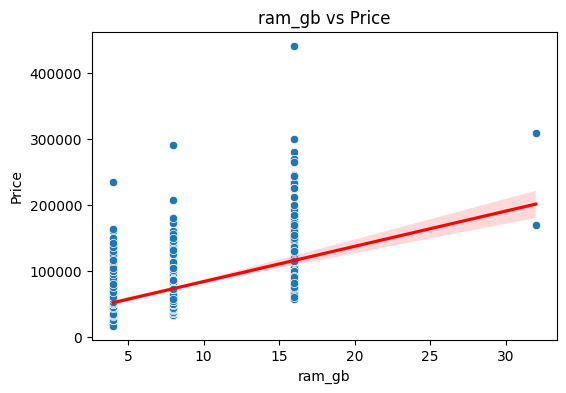

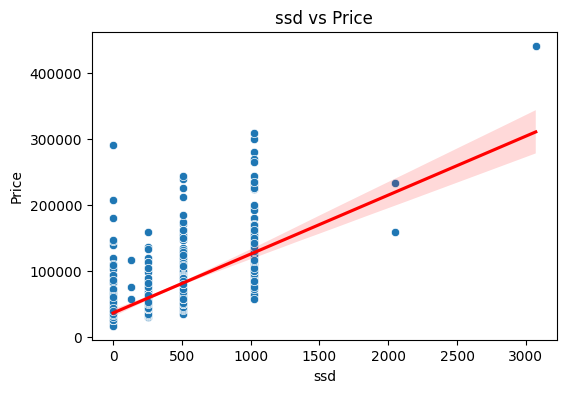

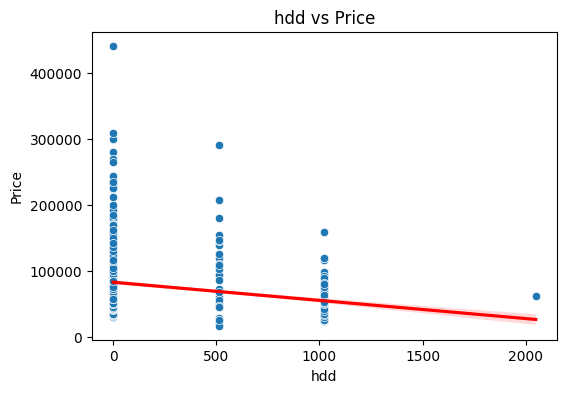

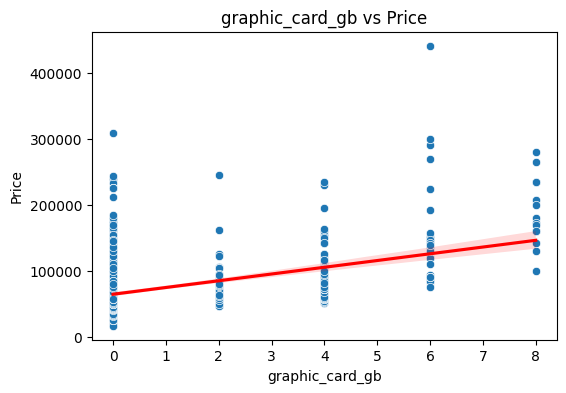

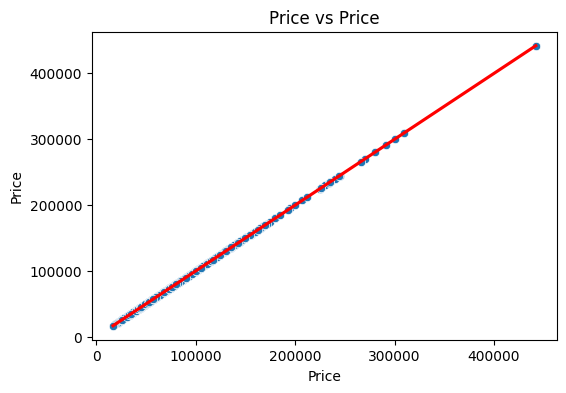

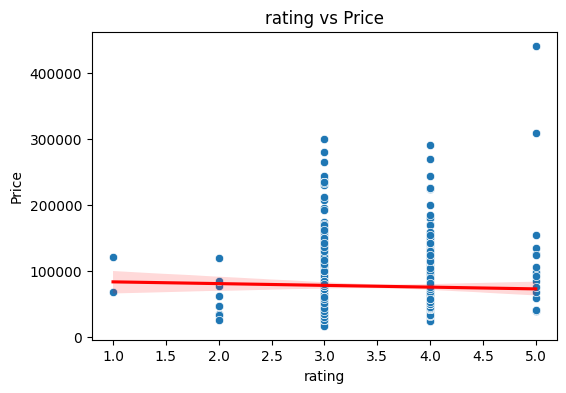

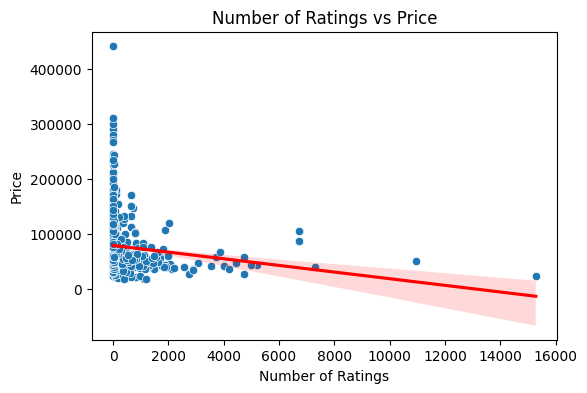

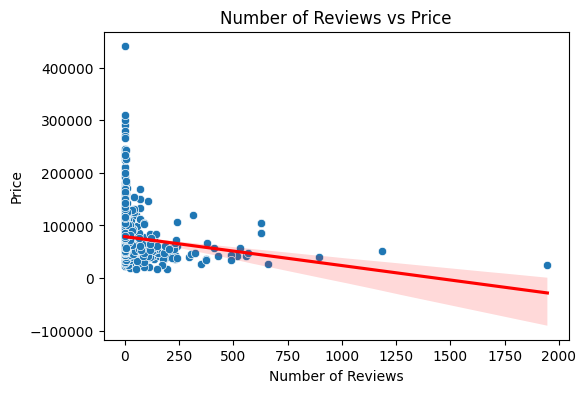

In [227]:
for feature in num_cols:
    plt.figure(figsize=(6,4))
    sns.scatterplot(data=laptops, x=feature, y='Price')
    sns.regplot(data=laptops, x=feature, y='Price', scatter=False, color='red')  # regression line
    plt.title(f'{feature} vs Price')
    plt.xlabel(feature)
    plt.ylabel('Price')
    plt.show()

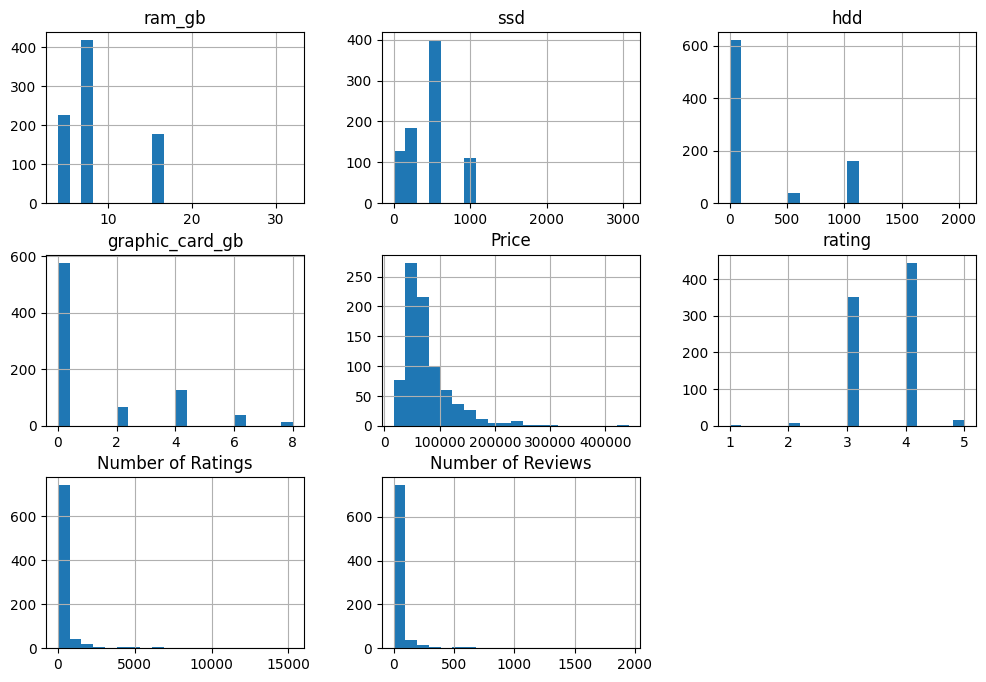

In [228]:
laptops[num_cols.columns].hist(figsize=(12,8), bins=20)
plt.show()

## OBSERVATIONS
1. Number of ratings has negative correlation with laptop price
2. Number of reviews has negative correlation with laptop Price
3. The numerical features are all right skewed

### REMOVING OUTLIERS

In [229]:
def z_score_anti_outlier(x, mean, std, threshold=3):
    z_score = (x - mean) / std
    if z_score > threshold or z_score < -threshold:
        return False
    else:
        return True


In [230]:
for feature in num_cols:
    mean = laptops[feature].mean()
    std = laptops[feature].std()
    laptops = laptops[(laptops[feature] - mean).abs() <= 3*std]

In [231]:
laptops.shape

(748, 18)

In [232]:
laptops.columns

Index(['brand', 'processor_brand', 'processor_name', 'processor_gnrtn',
       'ram_gb', 'ram_type', 'ssd', 'hdd', 'os', 'graphic_card_gb', 'weight',
       'warranty', 'Touchscreen', 'msoffice', 'Price', 'rating',
       'Number of Ratings', 'Number of Reviews'],
      dtype='object')

In [233]:
laptops.to_csv("cleaned_laptops.csv")

In [234]:
## Extracting Training Data

In [235]:
X = laptops.drop(columns=['Price'])
y = laptops['Price'].values.reshape(-1, 1)

In [236]:
X

,brand,processor_brand,processor_name,processor_gnrtn,ram_gb,ram_type,ssd,hdd,os,graphic_card_gb,weight,warranty,Touchscreen,msoffice,rating,Number of Ratings,Number of Reviews
0,ASUS,Intel,Core i3,10th,4,DDR4,0,1024,Windows,0,Casual,No warranty,No,No,2.0,3,0
1,Lenovo,Intel,Core i3,10th,4,DDR4,0,1024,Windows,0,Casual,No warranty,No,No,3.0,65,5
2,Lenovo,Intel,Core i3,10th,4,DDR4,0,1024,Windows,0,Casual,No warranty,No,No,3.0,8,1
3,ASUS,Intel,Core i5,10th,8,DDR4,512,0,Windows,2,Casual,No warranty,No,No,3.0,0,0
4,ASUS,Intel,Celeron Dual,Not Available,4,DDR4,0,512,Windows,0,Casual,No warranty,No,No,3.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
818,ASUS,AMD,Ryzen 9,Not Available,4,DDR4,1024,0,Windows,0,Casual,1 year,No,No,3.0,0,0
819,ASUS,AMD,Ryzen 9,Not Available,4,DDR4,1024,0,Windows,0,Casual,1 year,No,No,3.0,0,0
820,ASUS,AMD,Ryzen 9,Not Available,4,DDR4,1024,0,Windows,4,Casual,1 year,No,No,3.0,0,0
821,ASUS,AMD,Ryzen 9,Not Available,4,DDR4,1024,0,Windows,4,Casual,1 year,No,No,3.0,0,0


In [237]:
for col in laptops.columns:
    print(f"Column: {col}")
    print(laptops[col].unique())
    print()

Column: brand
['ASUS' 'Lenovo' 'acer' 'HP' 'DELL' 'MSI' 'APPLE' 'Avita']

Column: processor_brand
['Intel' 'AMD' 'M1']

Column: processor_name
['Core i3' 'Core i5' 'Celeron Dual' 'Ryzen 5' 'Core i7' 'Core i9' 'M1'
 'Pentium Quad' 'Ryzen 3' 'Ryzen 7' 'Ryzen 9']

Column: processor_gnrtn
['10th' 'Not Available' '11th' '7th' '8th' '9th' '4th' '12th']

Column: ram_gb
[ 4  8 16]

Column: ram_type
['DDR4' 'LPDDR4' 'LPDDR4X' 'DDR3' 'LPDDR3' 'DDR5']

Column: ssd
[   0  512  256  128 1024]

Column: hdd
[1024    0  512]

Column: os
['Windows' 'DOS' 'Mac']

Column: graphic_card_gb
[0 2 6 4]

Column: weight
['Casual' 'ThinNlight' 'Gaming']

Column: warranty
['No warranty' '1 year' '2 years' '3 years']

Column: Touchscreen
['No' 'Yes']

Column: msoffice
['No' 'Yes']

Column: Price
[ 34649  38999  39999  69990  26990  22990  21990  58799  49999  93700
  72990  35990  56490  65390  31999  32490  31799  29890  32955  46200
  34429  33980  39990  39490  53990  38990  37990  37890  41990  45990
  42490  

Applying Train Test Split

In [238]:
from sklearn.model_selection import train_test_split

x_train, x_, y_train, y_ = train_test_split(X, y, test_size=0.40, random_state=1)
x_cv, x_test, y_cv, y_test = train_test_split(x_, y_, test_size=0.50, random_state=1)

del x_, y_


In [239]:
print(f"the shape of the training set (input) is: {x_train.shape}")
print(f"the shape of the training set (target) is: {y_train.shape}\n")
print(f"the shape of the cross validation set (input) is: {x_cv.shape}")
print(f"the shape of the cross validation set (target) is: {y_cv.shape}\n")
print(f"the shape of the test set (input) is: {x_test.shape}")
print(f"the shape of the test set (target) is: {y_test.shape}")

the shape of the training set (input) is: (448, 17)
the shape of the training set (target) is: (448, 1)

the shape of the cross validation set (input) is: (150, 17)
the shape of the cross validation set (target) is: (150, 1)

the shape of the test set (input) is: (150, 17)
the shape of the test set (target) is: (150, 1)


In [240]:
from sklearn.preprocessing import OneHotEncoder

ohe=OneHotEncoder()
ohe.fit(X[['brand','processor_brand','processor_name','processor_gnrtn','ram_type','os','weight','warranty','Touchscreen','msoffice']])

,categories,'auto'
,drop,None
,sparse_output,True
,dtype,<class 'numpy.float64'>
,handle_unknown,'error'
,min_frequency,None
,max_categories,None
,feature_name_combiner,'concat'


Creating a column transformer to transform categorical columns

In [241]:
from sklearn.compose import make_column_transformer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler

categorical_cols = X.select_dtypes(include=['object']).columns
numeric_cols = X.select_dtypes(include=['number']).columns

cat_transformer = OneHotEncoder(handle_unknown='ignore')
num_transformer = StandardScaler()

preprocessor = ColumnTransformer(
    transformers=[
        ('cat', cat_transformer, categorical_cols),
        ('num', num_transformer, numeric_cols)
    ],
)

### Linear Regression

In [259]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

In [260]:
model.fit(x_train, y_train)

# Predict on test set
y_pred = model.predict(x_train)
print(f"training MSE (using sklearn function): {np.sqrt(mean_squared_error(y_train, y_pred) / 2)}")


training MSE (using sklearn function): 9397.136923287035


In [261]:
pred=model.predict(x_cv)

In [262]:
print(f"cv MSE (using sklearn function): {np.sqrt(mean_squared_error(y_cv, pred) / 2)}")


cv MSE (using sklearn function): 9778.677518499468


### The model is underfitting the trainging data

In [263]:
laptops.dtypes

brand                 object
processor_brand       object
processor_name        object
processor_gnrtn       object
ram_gb                 int64
ram_type              object
ssd                    int64
hdd                    int64
os                    object
graphic_card_gb        int64
weight                object
warranty              object
Touchscreen           object
msoffice              object
Price                  int64
rating               float64
Number of Ratings      int64
Number of Reviews      int64
dtype: object

In [264]:
laptops.iloc[1]

brand                     Lenovo
processor_brand            Intel
processor_name           Core i3
processor_gnrtn             10th
ram_gb                         4
ram_type                    DDR4
ssd                            0
hdd                         1024
os                       Windows
graphic_card_gb                0
weight                    Casual
warranty             No warranty
Touchscreen                   No
msoffice                      No
Price                      38999
rating                       3.0
Number of Ratings             65
Number of Reviews              5
Name: 1, dtype: object

1. THe above model seems to underfit because the J_train is less than J_cv
2. Lets use Polynomial Features to solve this bias condition of the model

In [300]:
cat_transformer = OneHotEncoder(handle_unknown='ignore')
num_transformer = StandardScaler()

preprocessor = ColumnTransformer(
    transformers=[
        ('cat', cat_transformer, categorical_cols),
        ('num', num_transformer, numeric_cols)
    ],
)

model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('poly', PolynomialFeatures(degree=2, include_bias=False)),
    ('regressor', LinearRegression(positive=True))
])

In [301]:
model.fit(x_train, y_train)

,steps,"[('preprocessor', ...), ('poly', ...), ...]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('cat', ...), ('num', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [302]:
y_pred = model.predict(x_train)
print(f"training MSE (using sklearn function): {np.sqrt(mean_squared_error(y_train, y_pred) / 2)}")
pred=model.predict(x_cv)
print(f"cv MSE (using sklearn function): {np.sqrt(mean_squared_error(y_cv, pred) / 2)}")


training MSE (using sklearn function): 4711.97223775614
cv MSE (using sklearn function): 14661.139971629733


### FINAL TRAIN

In [303]:
model.fit(x_train, y_train)

,steps,"[('preprocessor', ...), ('poly', ...), ...]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('cat', ...), ('num', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [304]:
y_pred=model.predict(pd.DataFrame(columns=['brand','processor_brand','processor_name','processor_gnrtn','ram_gb','ram_type','ssd','hdd','os','graphic_card_gb','weight','warranty','Touchscreen','msoffice','rating','Number of Ratings','Number of Reviews'],
                           data=np.array(['Apple','M1',"M1","Not Available",16,"DDR4",0,1024,'Mac',6,'Casual','1 year','No','No',4,375,25]).reshape(1,17)))

In [305]:
y_pred

array([[93822.5043422]])

In [306]:
import pickle

In [307]:
pickle.dump(model,open('LinearRegressionModelLaptop.pkl','wb'))
